# Embedding

🎯 Se familiariser avec les embeddings

# Données

Keras met à disposition plusieurs datasets, on va utiliser l'IMDB dataset 🎬:
- Chaque document est une ***review d'un film***. 
- Chaque review est liée à un score donnée par le spectateur

In [2]:
from keras import preprocessing 
import matplotlib.pyplot as plt



In [3]:
###########################################
### Charger les données ###
###########################################

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import text_to_word_sequence


def load_data(percentage_of_sentences=None):
    train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

    train_sentences, y_train = tfds.as_numpy(train_data)
    test_sentences, y_test = tfds.as_numpy(test_data)

    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)

        len_train = int(percentage_of_sentences/100*len(train_sentences))
        train_sentences, y_train = train_sentences[:len_train], y_train[:len_train]

        len_test = int(percentage_of_sentences/100*len(test_sentences))
        test_sentences, y_test = test_sentences[:len_test], y_test[:len_test]

    X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
    X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=10)


/Users/thibautlacroix/miniconda3/envs/Tensorflow/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm




❓ Regarder la forme des données 

In [4]:
#Fonction pour regarder la forme des données chargées 
def print_data_shape():
    print("X_train shape:", len(X_train))
    print("y_train shape:", len(y_train))
    print("X_test shape:", len(X_test))
    print("y_test shape:", len(y_test))

print_data_shape()


X_train shape: 2500
y_train shape: 2500
X_test shape: 2500
y_test shape: 2500


**LABELS**: classification binaire:
- label 0️⃣ correspond à une review <font color=red>negative</font> 
- label 1️⃣ correspond à une review <font color=green>positive</font> 

**INPUTS**: 
- 🧹 Les données ont déjà suivi un preprocessing

❓ Tokeniser le corpus

In [5]:
# Fonction pour tokeniser le corpus 

def tokenize_corpus(corpus, num_words=None):
    tokenizer = preprocessing.text.Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(corpus)
    print("Nombre de mots dans le vocabulaire:", len(tokenizer.word_index))
    print("Exemple de mots dans le vocabulaire:", list(tokenizer.word_index.keys())[:10])
    return tokenizer

X_train_token = tokenize_corpus(X_train)



Nombre de mots dans le vocabulaire: 30419
Exemple de mots dans le vocabulaire: ['the', 'a', 'and', 'of', 'to', 'is', 'br', 'in', 'i', 'it']


❓ Imprimer quelques sequences pour observer le résultat

In [6]:
sentence_number = 100

input_raw = X_train[sentence_number]

# Use the `texts_to_sequences` method of the `Tokenizer` object to convert the input sentence to a sequence of tokens
input_token = X_train_token.texts_to_sequences([input_raw])[0]

for i in range(40):
    print(f'Word : {input_raw[i]} -> Token {input_token[i]}')


Word : i -> Token 9
Word : enjoyed -> Token 579
Word : this -> Token 11
Word : movie -> Token 18
Word : and -> Token 3
Word : after -> Token 104
Word : watching -> Token 155
Word : it -> Token 10
Word : it -> Token 10
Word : made -> Token 90
Word : me -> Token 65
Word : wonder -> Token 574
Word : just -> Token 40
Word : how -> Token 84
Word : many -> Token 107
Word : 'caitlin -> Token 17238
Word : rose's' -> Token 17239
Word : exist -> Token 1632
Word : in -> Token 8
Word : the -> Token 1
Word : world -> Token 189
Word : how -> Token 84
Word : many -> Token 107
Word : other -> Token 82
Word : girls -> Token 526
Word : have -> Token 25
Word : been -> Token 76
Word : subjected -> Token 5574
Word : to -> Token 5
Word : this -> Token 11
Word : sort -> Token 406
Word : of -> Token 4
Word : sexual -> Token 991
Word : abuse -> Token 2393
Word : and -> Token 3
Word : torment -> Token 8200
Word : by -> Token 31
Word : classmates -> Token 7069
Word : and -> Token 3
Word : have -> Token 25


Le dictionnaire qui fait le mapping de chaque token est accesible dans `tokenizer.word_index`
    
❓ Créer une variable `vocab_size` qui contient le nombre de mots differentes dans le corpus d'entraînement.

In [7]:
#Création d'une variable vocab_size qui contient le nombre de mots différents dans le corpus d'entrainement

vocab_size = len(X_train_token.word_index) + 1
print("Nombre de mots dans le vocabulaire:", vocab_size)

Nombre de mots dans le vocabulaire: 30420


Les sequences dans `X_train_token` et `X_test_token` ont des longueurs differentes.

<img src="padding.png" alt='Word2Vec' width="700px" />

Le padding est necessaire.

❓ Utiliser l'utilité de tensor flow pour faire du padding.

In [8]:
#Fonction pour faire du padding en utilisant tensorflow 

def pad_corpus(corpus, max_length=None):
    return preprocessing.sequence.pad_sequences(corpus, maxlen=max_length, padding='post')

X_train_pad = pad_corpus(X_train_token.texts_to_sequences(X_train), max_length=100)
X_test_pad = pad_corpus(X_train_token.texts_to_sequences(X_test), max_length=100)

# RNN

❓ Ecrire un modèle avec:
- une couche d'embedding, les parametres: `input_dim` est la taille du vocabulaire (= `vocab_size`), et `output_dim` la dimension de l'embedding
- une couche RNN (SimpleRNN, LSTM, GRU)
- une couche dense
- une couche de sortie



<details>
    <summary>💡 Piste</summary>

`input_dim` doit être égal à la taille du vocabulaire + 1 

</details>

Compiler le modèle

In [9]:
# Ecrire un modèle avec une couche d'embedding avec un paramètre input_dim est la taille du vocabulaire (=vocab_size) et output_dim est la taille de l'espace de l'embedding des mots (=embedding_dim)
#Une couche RNN(simpleRNN,LSTM,GRU)
#Une couche Dense avec une activation sigmoid
#Une couche de sortie 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1, activation='sigmoid'))




❓ Regarder le nombre des paramètres dans le modèle 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         3042000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3046289 (11.62 MB)
Trainable params: 3046289 (11.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


❓ Entraîner le modèle avec un early stopping avec patience = 4.

Epoch 1/100
63/63 [==============================] - 2s 17ms/step - loss: 0.6976 - accuracy: 0.4955 - val_loss: 0.6903 - val_accuracy: 0.5200
Epoch 2/100
63/63 [==============================] - 1s 15ms/step - loss: 0.4440 - accuracy: 0.9010 - val_loss: 0.7679 - val_accuracy: 0.5040
Epoch 3/100
63/63 [==============================] - 1s 16ms/step - loss: 0.1316 - accuracy: 0.9810 - val_loss: 0.8068 - val_accuracy: 0.5080
Epoch 4/100
63/63 [==============================] - 1s 15ms/step - loss: 0.0434 - accuracy: 0.9965 - val_loss: 0.9286 - val_accuracy: 0.5040
Epoch 5/100
63/63 [==============================] - 1s 14ms/step - loss: 0.0143 - accuracy: 0.9995 - val_loss: 1.0197 - val_accuracy: 0.5000


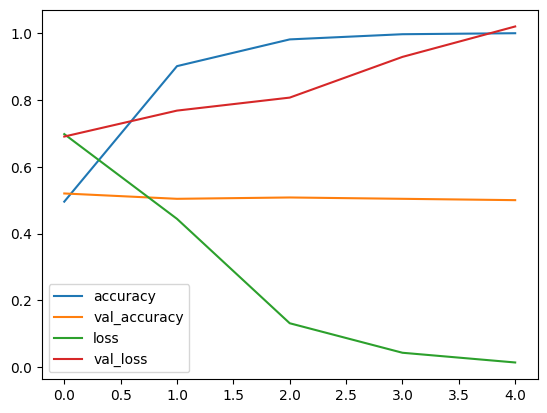

In [11]:
#Entrainer le modèle avec un early stopping avec patience = 4 

from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(patience=4)])

#Fonction pour afficher les courbes d'apprentissage

def plot_history(history):

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

plot_history(history)


❓ Pour essayer d'optimiser le temps d'entraînement, regarder la distribution de la taille de chaque document

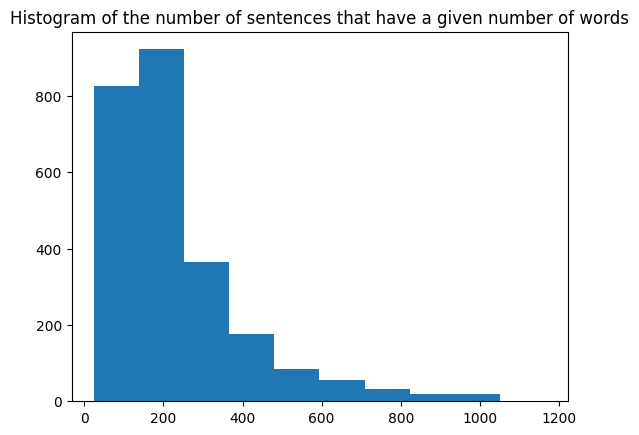

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(X):
    len_ = [len(_) for _ in X]
    plt.hist(len_)
    plt.title('Histogram of the number of sentences that have a given number of words')
    plt.show()

plot_hist(X_train)


90 - 95% des documents ont moins de 300 mots.

Comme on n'a pas spécifié `maxlen` dans le padding le tensor a la dimension egal a la taille du document le plus long. (+1000 mots)

<img src="tensor_size.png" alt='Word2Vec' width="700px" />

❓ Refaire le padding avec un `maxlen` de 200 et entraîner à nouveau le modèle. Comparer la vitesse d'entraînement et la performance du modèle

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         3042000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3046289 (11.62 MB)
Trainable params: 3046289 (11.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 25ms/step - loss: 0.6933 - accuracy: 0.5110 - val_loss: 0.6897 - val_accuracy: 0.5340
Epoch 2/100
63/63 [==============================] - 1s 23ms/step - loss: 0.5968 - accuracy: 0.6845 - val_loss: 0.7092 - val_accuracy: 0

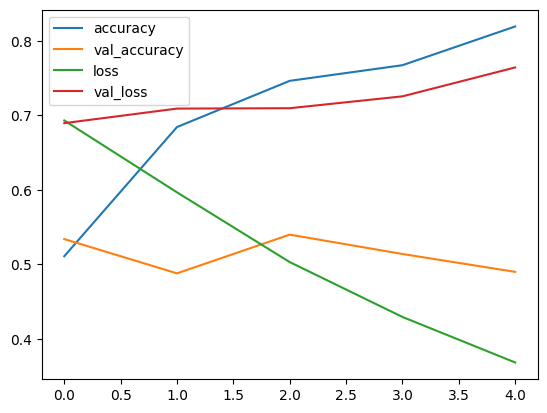

In [14]:
# Refaire le padding avec une maxlen de 200 et entrainer un nouveau modèle 

X_train_pad = pad_corpus(X_train_token.texts_to_sequences(X_train), max_length=200)
X_test_pad = pad_corpus(X_train_token.texts_to_sequences(X_test), max_length=200)

embedding_dim = 100
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model2.add(SimpleRNN(units=32))
model2.add(Dense(units=1, activation='sigmoid'))

model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train_pad, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(patience=4)])

plot_history(history2)


